<a href="https://colab.research.google.com/github/KaramalakarthikAchari/Online_Retail_Analysis./blob/main/online_rential_sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [13]:

df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string',
                                                 'StockCode': 'string',
                                                 'Description': 'string',
                                                 'Country': 'string'})

df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [14]:
df1.shape

(541909, 8)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [ ]:
#### data cleaning: Handle Missing values

In [16]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [18]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [19]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [25]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [32]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,freq_Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [28]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq


,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


In [37]:

most_freq.columns = ["StockCode", "freq_Description", "Count"]
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [38]:
df2['Description'] = df2["freq_Description"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [39]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
Count,112


In [40]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
Count,0


In [42]:
df2.drop(columns=["freq_Description", "Count"], inplace=True)
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [43]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [44]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [46]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [47]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [48]:
df3.Quantity.quantile(0.99)

np.float64(100.0)

In [51]:
df3[df3.Quantity>1500].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom


In [52]:
df4 = df3.copy()
df4['TotalSales'] = df4['Quantity'] = df4['UnitPrice']
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.55
1,536365,71053,WHITE METAL LANTERN,3.39,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2.75


In [54]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
125459,547042,22469,HEART OF WICKER SMALL,1.65,2011-03-20 11:00:00,1.65,NaN,United Kingdom,1.65,3
240016,558079,22635,CHILDS BREAKFAST SET DOLLY GIRL,9.95,2011-06-26 11:01:00,9.95,17402.0,United Kingdom,9.95,6
470530,576617,21648,ASSORTED TUTTI FRUTTI SMALL PURSE,2.46,2011-11-15 16:57:00,2.46,NaN,United Kingdom,2.46,11
511790,579508,23176,ABC TREASURE BOOK BOX,4.58,2011-11-29 16:33:00,4.58,NaN,United Kingdom,4.58,11
463829,576073,22558,CLOTHES PEGS RETROSPOT PACK 24,1.65,2011-11-13 16:13:00,1.65,16930.0,United Kingdom,1.65,11


# **visualiZation & EDA**

#### 1.plot Monthly Sales

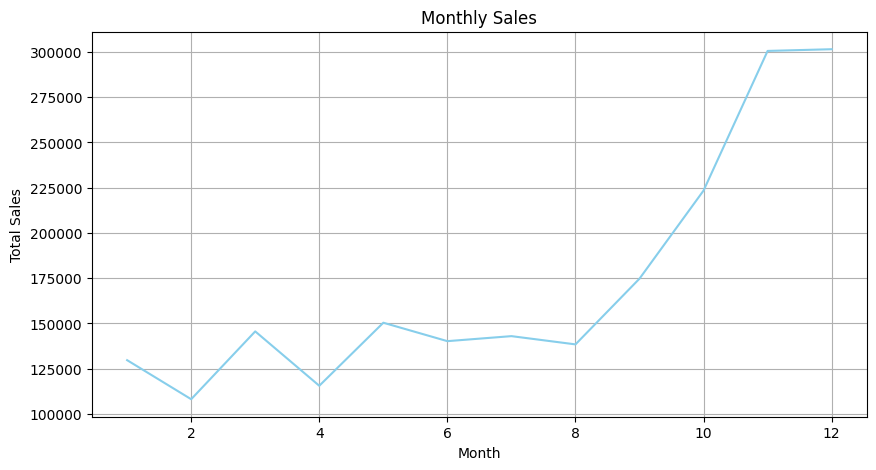

In [62]:


monthly_sales = df4.groupby('Month')["TotalSales"].sum()
monthly_sales.plot(kind="line", title="Monthly Sales", figsize=(10,5), color='skyblue')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


#### 2. Top 5 countries for sales

In [65]:
# prompt: plot horizontal bar char for top 5 countires by total sales

top_5_countires = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
top_5_countires


,TotalSales
Country,
United Kingdom,1867568.034
EIRE,38489.950
France,36992.790
Germany,33532.140
Singapore,12949.990


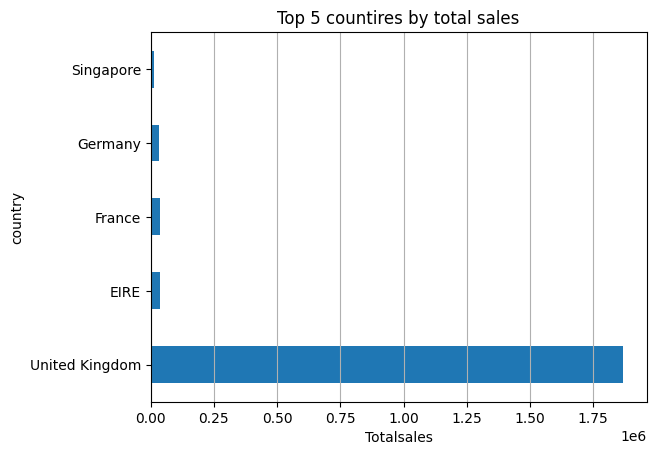

In [67]:
top_5_countires.plot(kind="barh", title='Top 5 countires by total sales')
plt.xlabel('Totalsales')
plt.ylabel('country')
plt.grid(axis= 'x')
plt.show()

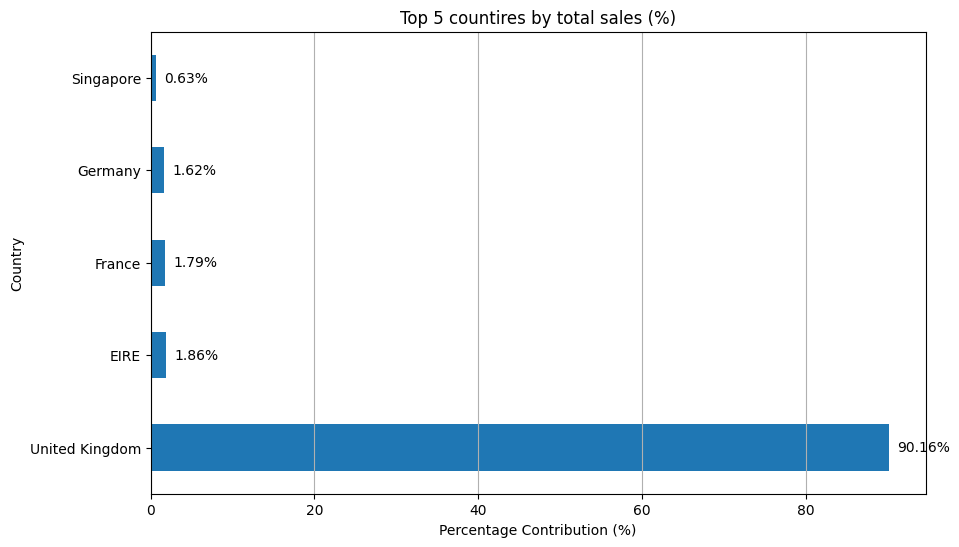

In [69]:
# prompt: plot same chart as above but this time use percentage contribution show % on the bar

total_sales_all_countries = df4['TotalSales'].sum()
top_5_countires_percentage = (top_5_countires / total_sales_all_countries) * 100

ax = top_5_countires_percentage.plot(kind="barh", title='Top 5 countires by total sales (%)', figsize=(10, 6))
plt.xlabel('Percentage Contribution (%)')
plt.ylabel('Country')
plt.grid(axis='x')

# Add percentages to the bars
for i, v in enumerate(top_5_countires_percentage):
    ax.text(v + 1, i, f"{v:.2f}%", color='black', va='center')

plt.show()

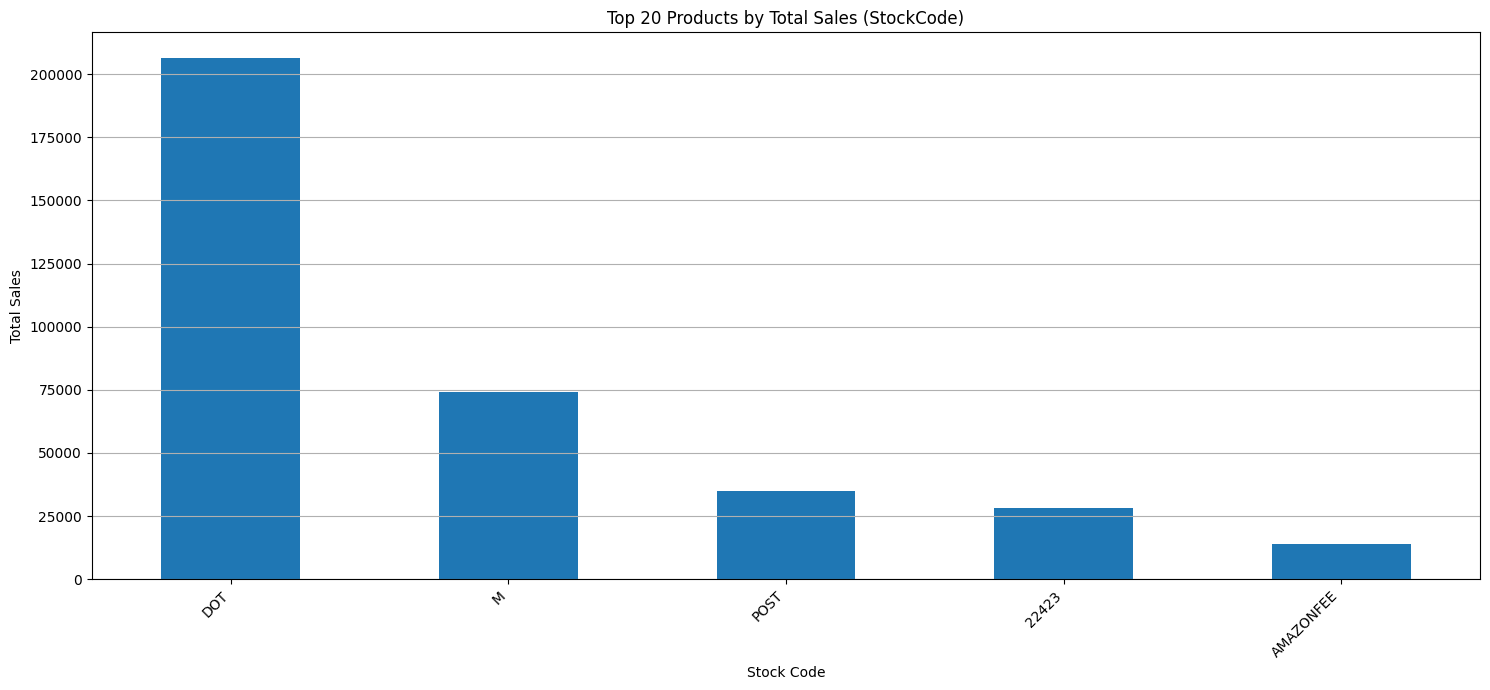

In [71]:
# prompt: product wise slaes using stock code on the bar

product_sales = df4.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)
top_n_products = 20
top_product_sales = product_sales.head(top_n_products).head(5)

plt.figure(figsize=(15, 7))
top_product_sales.plot(kind='bar')
plt.title(f'Top {top_n_products} Products by Total Sales (StockCode)')
plt.xlabel('Stock Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
product_wise_sales = df4.groupby('StockCode')["TotalSales"].sum()
product_wise_sales = product_wise_sales.sort_values(ascending=False)
product_wise_sales


,TotalSales
StockCode,
DOT,206248.770
M,74106.230
POST,34992.230
22423,28191.460
AMAZONFEE,13761.090
...,...
90214U,0.290
16043,0.240
84206B,0.190


In [77]:
product_wise_sales.sum()

np.float64(2071447.774)

In [78]:
df4[df4.StockCode=="DOT"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,569.77,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,607.49,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,254.43,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,121.06,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,498.47,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1008.96,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1683.75,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,938.59,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,933.17,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [80]:

product_wise_sales = df4.groupby('StockCode')["TotalSales"].sum()
top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
for Stock_code in top_5_products.index:
    description = df4[df4.StockCode == Stock_code]['Description'].iloc[0]
    print(f"{Stock_code} ==> {description}")


DOT ==> DOTCOM POSTAGE
M ==> Manual
POST ==> POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
AMAZONFEE ==> AMAZON FEE


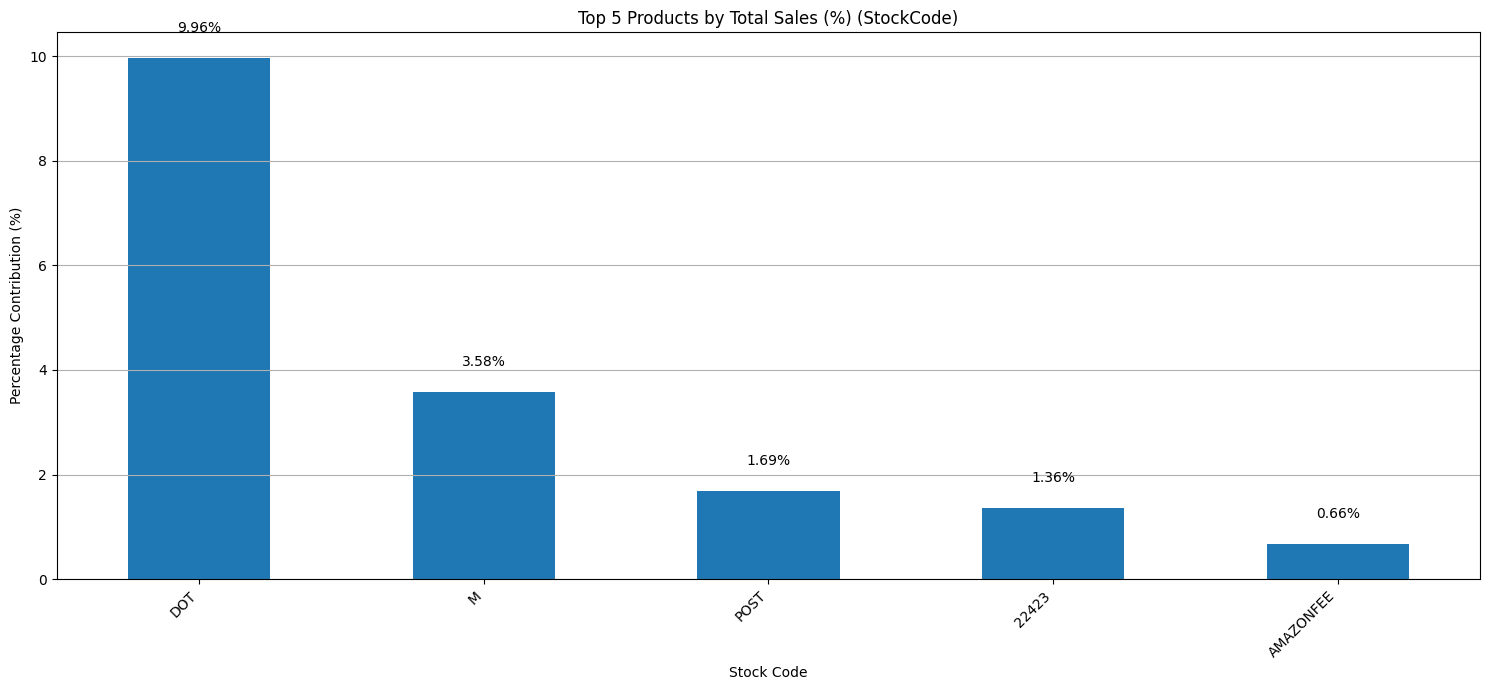

In [81]:
# prompt: plot same chart as above for product sales but  use percentage this time. show % on the bar

total_sales_all_products = df4['TotalSales'].sum()
top_5_products_percentage = (top_5_products / total_sales_all_products) * 100

plt.figure(figsize=(15, 7))
ax = top_5_products_percentage.plot(kind='bar')
plt.title(f'Top 5 Products by Total Sales (%) (StockCode)')
plt.xlabel('Stock Code')
plt.ylabel('Percentage Contribution (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add percentages to the bars
for i, v in enumerate(top_5_products_percentage):
    ax.text(i, v + 0.5, f"{v:.2f}%", color='black', ha='center')

plt.tight_layout()
plt.show()

In [86]:
current_dt = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [92]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_dt - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,1.04
12347.0,2,182,481.21
12348.0,75,31,178.71
12349.0,19,73,605.10
12350.0,310,17,65.30


In [97]:
df4[df4.CustomerID==12346] ["TotalSales"].sum()

np.float64(1.04)

In [99]:

rfm['R_Segment'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].astype(int).sum(axis=1)
rfm.head()


,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,1.04,1,1,1,3
12347.0,2,182,481.21,5,5,5,15
12348.0,75,31,178.71,2,3,4,9
12349.0,19,73,605.10,4,4,5,13
12350.0,310,17,65.30,1,2,2,5


In [100]:
#customers with highest RFM scores
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18272.0,3,166,380.91,5,5,5,15
12362.0,3,266,1048.29,5,5,5,15
12347.0,2,182,481.21,5,5,5,15
18283.0,4,756,1220.93,5,5,5,15
14178.0,9,327,556.92,5,5,5,15
...,...,...,...,...,...,...,...
13120.0,239,1,2.55,1,1,1,3
13132.0,262,3,14.80,1,1,1,3
13133.0,274,7,37.40,1,1,1,3


In [101]:
# create a basket matrix for association rule mining
customers_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customers_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [103]:
current_dt

Timestamp('2011-12-10 12:50:00')

In [104]:
customer_last_purchase = pd.DataFrame(customers_last_purchase)
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [109]:
# Get the most recent InvoiceDate for each customer
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase = (current_dt - customer_last_purchase).dt.days
churn_threshold = 90

churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]

churned_customers.head(5)


,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of churned Customers: 1449


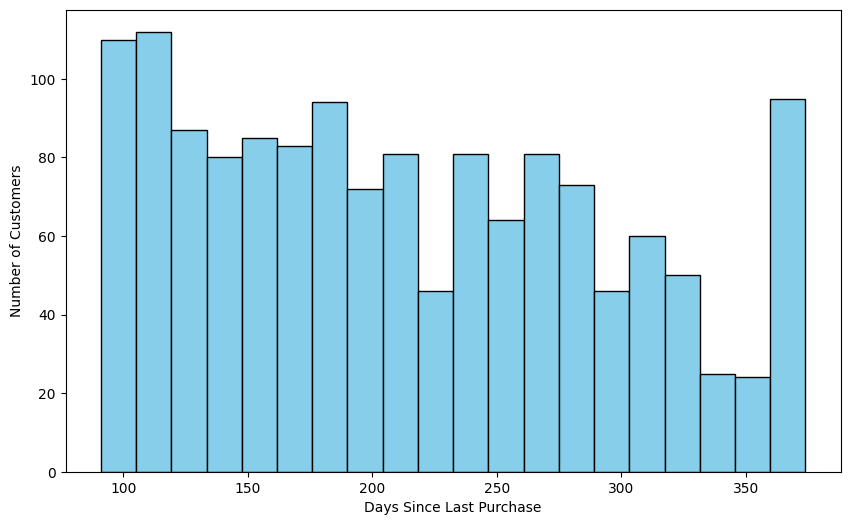

In [110]:
print("Number of churned Customers:", len(churned_customers))
plt.figure(figsize=(10,6))
plt.hist(churned_customers, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()